In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data9size5.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),9),to_categorical((np.array(y_val)),9),to_categorical((np.array(y_test)),9)

In [4]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    factor=1e-5
    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', kernel_regularizer=l2(factor),input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(factor)))
    
    model.add(layers.Dense(9, activation='softmax'))
    #model.summary()
    return model
from tensorflow.keras.regularizers import l2
model = model_build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          1

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2
import datetime
#model = model_build(1e-5, 0.3)
model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
591/591 [==============================] - 24s 39ms/step - loss: 1.5515 - accuracy: 0.4257 - val_loss: 1.2416 - val_accuracy: 0.5521
Epoch 2/20
591/591 [==============================] - 21s 36ms/step - loss: 1.1941 - accuracy: 0.5726 - val_loss: 1.1095 - val_accuracy: 0.5999
Epoch 3/20
591/591 [==============================] - 21s 36ms/step - loss: 1.0725 - accuracy: 0.6146 - val_loss: 1.0364 - val_accuracy: 0.6290
Epoch 4/20
591/591 [==============================] - 21s 36ms/step - loss: 1.0254 - accuracy: 0.6283 - val_loss: 1.0186 - val_accuracy: 0.6343
Epoch 5/20
591/591 [==============================] - 21s 36ms/step - loss: 0.9960 - accuracy: 0.6394 - val_loss: 1.0316 - val_accuracy: 0.6329
Epoch 6/20
591/591 [==============================] - 21s 36ms/step - loss: 0.9748 - accuracy: 0.6475 - val_loss: 0.9943 - val_accuracy: 0.6429
Epoch 7/20
591/591 [==============================] - 21s 36ms/step - loss: 0.9491 - accuracy: 0.6534 - val_loss: 0.9844 - val_accuracy:

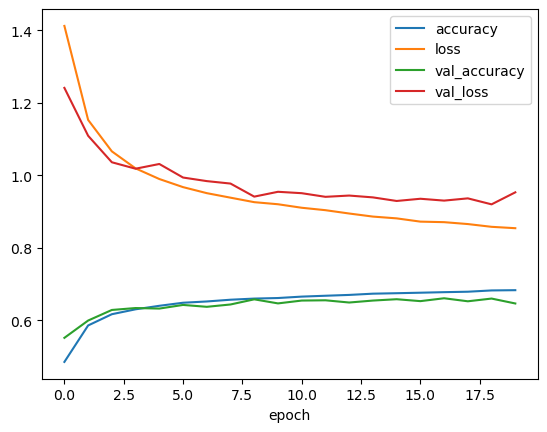

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9279558658599854
Test accuracy: 0.6583095192909241
